In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from apyori import apriori

In [45]:
#W notebooku zrobiono:
#  1. Wgrano i wyświetlono dane
#  2. Dane zostały oczyszczone z kluczy
#  3. Zliczono poszczególne wartości, przedstwiono w formie graficznej - wizualizacja danych (wykresy kołowe, słupkowe)

In [46]:
opr = pd.read_csv('baza.csv')
opr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   personid             112 non-null    int64 
 1   fk_test              112 non-null    int64 
 2   answers_id           112 non-null    int64 
 3   gender               112 non-null    object
 4   age                  112 non-null    object
 5   residence            112 non-null    object
 6   education            112 non-null    object
 7   SIknowledge          112 non-null    bool  
 8   result_id            112 non-null    int64 
 9   quizSI1              112 non-null    bool  
 10  quizSI2              112 non-null    bool  
 11  quizSI3              112 non-null    bool  
 12  quizSI4              112 non-null    bool  
 13  quizSI5              112 non-null    bool  
 14  quizSI6              112 non-null    bool  
 15  answers_id.1         112 non-null    int64 
 16  have_met

In [47]:
opr.head()

,personid,fk_test,answers_id,gender,age,residence,education,SIknowledge,result_id,quizSI1,quizSI2,quizSI3,quizSI4,quizSI5,quizSI6,answers_id.1,have_met,SIvsSystemy,feelings,EasyToFind,EasyToFindExample1,EasyToFindExample2,EasyToFindExample3,EasyToFindExample4,EasyToFindExample5,EasyToFindExample6,are_useful,fear,endangered,linkMonitoring1,linkMonitoring2,linkMonitoring3,linkMonitoring4,linkMonitoring5,linkMonitoring6,is_good,is_affecting,would_you_accept,is_helping,emotional_disorders
0,1,1,1,male,18-25,0-50k,studia,True,1,True,True,True,True,True,True,1,False,True,Neutr,False,True,False,True,True,False,True,FALSE,False,False,True,True,False,False,True,False,False,True,False,TRUE,RaczPozyt
1,2,2,2,male,18-25,500k+,studia,True,2,False,True,False,True,True,True,2,True,True,Negat,True,True,False,True,False,True,True,FALSE,True,True,True,False,False,False,True,False,False,True,False,IDK,RaczNegat
2,3,3,3,male,18-25,500k+,wyz,True,3,True,False,False,True,False,False,3,True,True,Pozyt,False,False,True,False,True,True,True,IDK,True,False,True,False,False,True,False,False,False,True,False,FALSE,RaczNegat
3,4,4,4,male,18-25,500k+,studia,True,4,False,True,True,True,True,False,4,True,True,Negat,False,False,False,True,True,False,True,FALSE,True,True,True,True,False,False,True,True,False,True,True,IDK,0zmian
4,5,5,5,male,18-25,500k+,sred,True,5,False,True,False,False,False,False,5,True,True,Negat,False,False,False,True,True,False,True,FALSE,True,True,True,False,False,False,False,False,True,True,False,IDK,0zmian


In [48]:
opr.isna().sum().sum()

0

In [49]:
opr.isnull().sum().sum()

0

In [50]:
df = opr.drop(['personid','fk_test','answers_id','result_id','answers_id.1'], axis=1)

In [51]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [52]:
df

,gender,age,residence,education,SIknowledge,quizSI1,quizSI2,quizSI3,quizSI4,quizSI5,quizSI6,have_met,SIvsSystemy,feelings,EasyToFind,EasyToFindExample1,EasyToFindExample2,EasyToFindExample3,EasyToFindExample4,EasyToFindExample5,EasyToFindExample6,are_useful,fear,endangered,linkMonitoring1,linkMonitoring2,linkMonitoring3,linkMonitoring4,linkMonitoring5,linkMonitoring6,is_good,is_affecting,would_you_accept,is_helping,emotional_disorders
0,male,18-25,0-50k,studia,True,True,True,True,True,True,True,False,True,Neutr,False,True,False,True,True,False,True,FALSE,False,False,True,True,False,False,True,False,False,True,False,TRUE,RaczPozyt
1,male,18-25,500k+,studia,True,False,True,False,True,True,True,True,True,Negat,True,True,False,True,False,True,True,FALSE,True,True,True,False,False,False,True,False,False,True,False,IDK,RaczNegat
2,male,18-25,500k+,wyz,True,True,False,False,True,False,False,True,True,Pozyt,False,False,True,False,True,True,True,IDK,True,False,True,False,False,True,False,False,False,True,False,FALSE,RaczNegat
3,male,18-25,500k+,studia,True,False,True,True,True,True,False,True,True,Negat,False,False,False,True,True,False,True,FALSE,True,True,True,True,False,False,True,True,False,True,True,IDK,0zmian
4,male,18-25,500k+,sred,True,False,True,False,False,False,False,True,True,Negat,False,False,False,True,True,False,True,FALSE,True,True,True,False,False,False,False,False,True,True,False,IDK,0zmian
5,female,18-25,500k+,studia,True,True,True,False,False,True,False,True,True,Negat,True,True,True,True,True,True,True,TRUE,True,True,True,True,False,False,True,True,True,True,False,TRUE,RaczPozyt
6,male,18-25,wies,studia,True,True,True,True,True,True,True,True,True,Neutr,True,True,False,True,True,False,False,IDK,True,True,True,True,True,True,True,True,False,True,False,TRUE,RaczPozyt
7,male,18-25,wies,studia,True,False,True,True,True,True,False,True,True,Neutr,False,True,False,False,True,True,True,TRUE,False,True,True,False,False,True,True,True,True,True,True,TRUE,0zmian
8,male,18-25,500k+,studia,True,True,True,False,True,True,True,True,False,Neutr,False,False,False,False,True,False,True,IDK,False,False,True,True,False,True,True,False,False,True,False,IDK,0zmian
9,male,18-25,500k+,sred,True,False,False,False,False,False,True,True,True,Neutr,False,False,False,False,False,False,True,IDK,False,True,False,False,True,False,False,False,True,True,False,TRUE,0zmian


In [53]:
for col in df.columns:
  print(df[col].value_counts())

male      67
female    44
other      1
Name: gender, dtype: int64
18-25    100
<18       11
26-35      1
Name: age, dtype: int64
500k+       67
100-500k    14
0-50k       12
wies        12
50-100k      7
Name: residence, dtype: int64
studia    71
sred      25
wyz        8
podst      6
zawod      1
gim        1
Name: education, dtype: int64
True     110
False      2
Name: SIknowledge, dtype: int64
False    90
True     22
Name: quizSI1, dtype: int64
True     92
False    20
Name: quizSI2, dtype: int64
False    73
True     39
Name: quizSI3, dtype: int64
True     56
False    56
Name: quizSI4, dtype: int64
False    74
True     38
Name: quizSI5, dtype: int64
False    81
True     31
Name: quizSI6, dtype: int64
True     71
False    41
Name: have_met, dtype: int64
True     100
False     12
Name: SIvsSystemy, dtype: int64
Neutr    68
Pozyt    24
Negat    20
Name: feelings, dtype: int64
False    83
True     29
Name: EasyToFind, dtype: int64
False    57
True     55
Name: EasyToFindExample1, dtype: 

<AxesSubplot:>

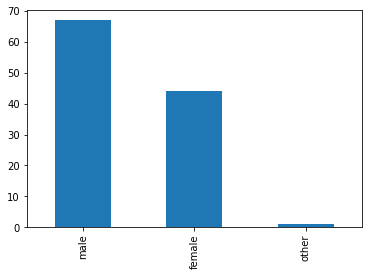

In [54]:
df.gender.value_counts().plot(kind = 'bar')

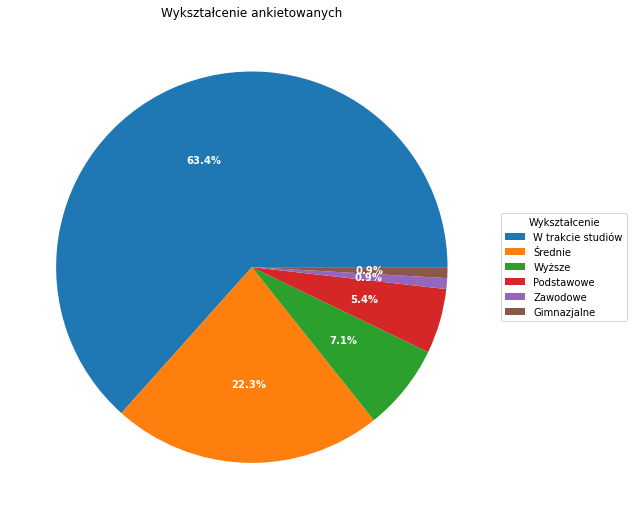

In [55]:
data = df.education.value_counts()
fig, ax = plt.subplots(figsize=(15, 9), subplot_kw=dict(aspect="equal"))


def func(pct):
    return "{:.1f}%".format(pct)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct),
                                  textprops=dict(color="w"))

ax.legend(wedges, ["W trakcie studiów","Średnie","Wyższe","Podstawowe","Zawodowe","Gimnazjalne"],
          title="Wykształcenie",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Wykształcenie ankietowanych")

plt.show()

<AxesSubplot:>

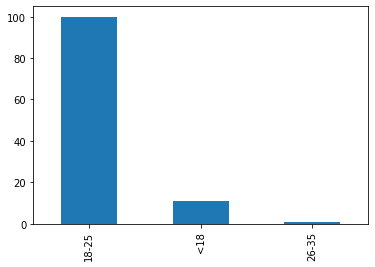

In [56]:
df.age.value_counts().plot(kind = 'bar')

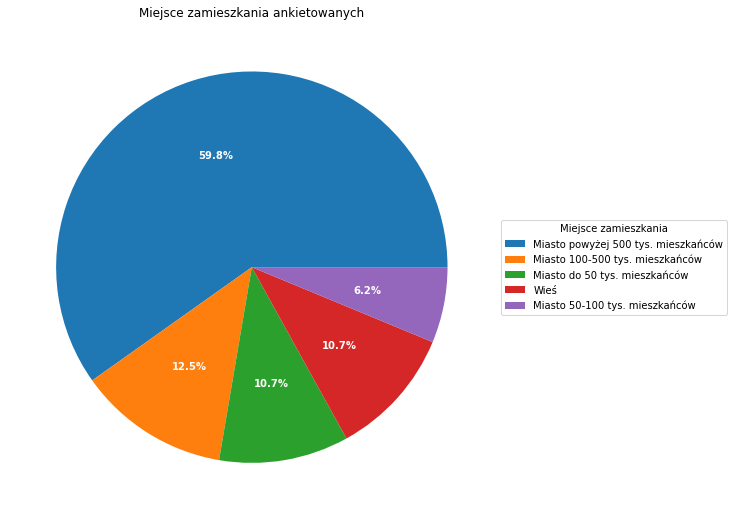

In [57]:
data1 = df.residence.value_counts()
fig, ax = plt.subplots(figsize=(15, 9), subplot_kw=dict(aspect="equal"))


def func(pct):
    return "{:.1f}%".format(pct)


wedges, texts, autotexts = ax.pie(data1, autopct=lambda pct: func(pct),
                                  textprops=dict(color="w"))

ax.legend(wedges, ["Miasto powyżej 500 tys. mieszkańców","Miasto 100-500 tys. mieszkańców","Miasto do 50 tys. mieszkańców","Wieś","Miasto 50-100 tys. mieszkańców"],
          title="Miejsce zamieszkania",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Miejsce zamieszkania ankietowanych")

plt.show()

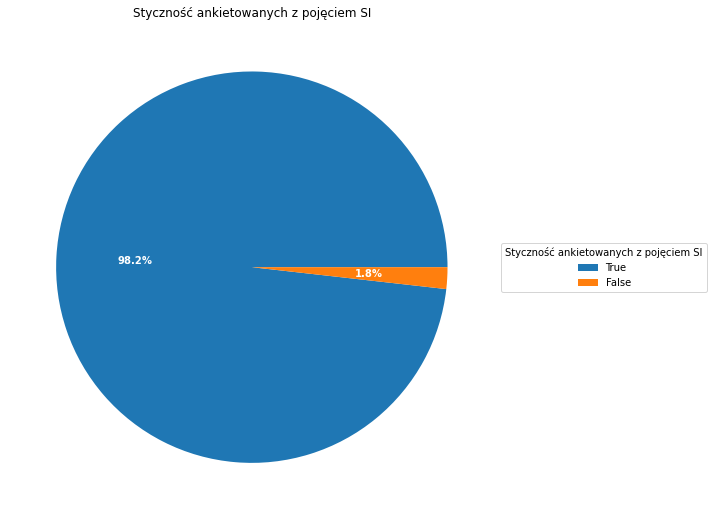

In [58]:
data2 = df.SIknowledge.value_counts()
fig, ax = plt.subplots(figsize=(15, 9), subplot_kw=dict(aspect="equal"))


def func(pct):
    return "{:.1f}%".format(pct)


wedges, texts, autotexts = ax.pie(data2, autopct=lambda pct: func(pct),
                                  textprops=dict(color="w"))

ax.legend(wedges, df.SIknowledge.unique(),
          title="Styczność ankietowanych z pojęciem SI",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")

ax.set_title("Styczność ankietowanych z pojęciem SI")

plt.show()

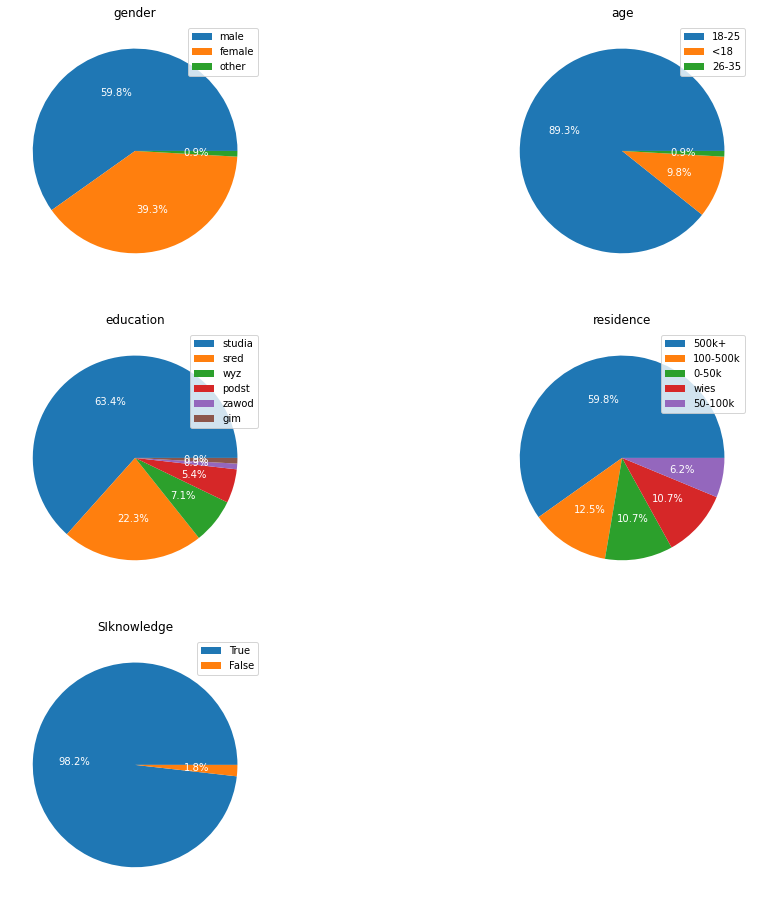

In [59]:
categorical1 = ['gender','age','education','residence','SIknowledge']

def func(pct):
    return "{:.1f}%".format(pct)


plt.figure(figsize=(16, 16))
for i, col in enumerate(categorical1):
    ax = plt.subplot(3, 2, i+1)
    ax.pie(df[col].value_counts(), autopct=lambda pct: func(pct),
                                  textprops=dict(color="w"))
    
    ax.set_title(col)
    
    plt.legend(df[col].value_counts().index.tolist())

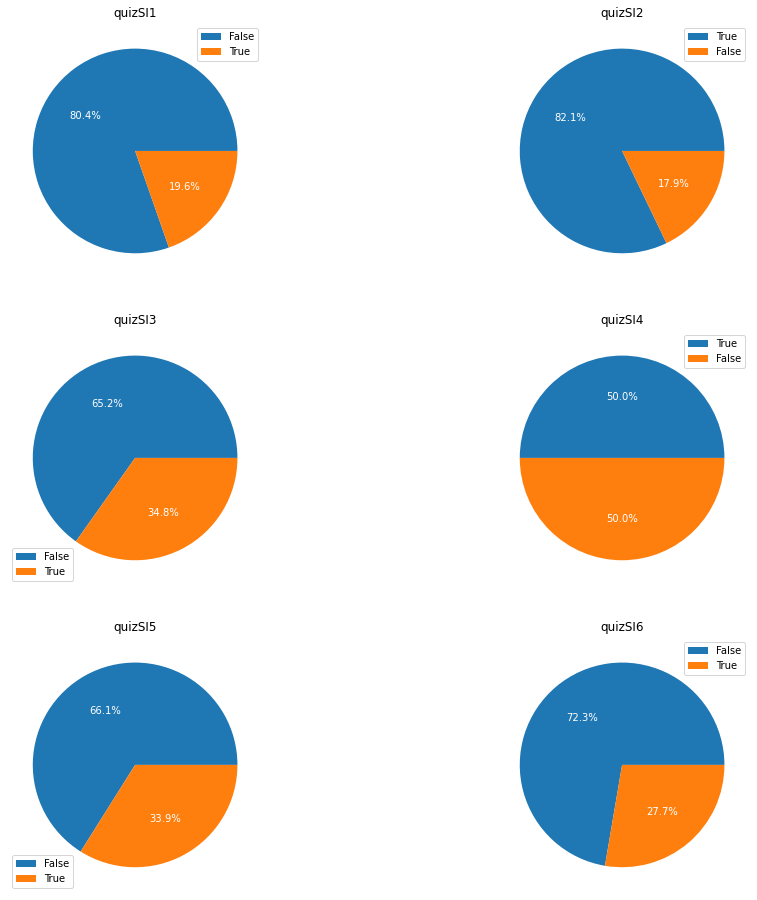

In [60]:
categorical2 = ['quizSI1','quizSI2','quizSI3','quizSI4','quizSI5','quizSI6']

def func(pct):
    return "{:.1f}%".format(pct)


plt.figure(figsize=(16, 16))
for i, col in enumerate(categorical2):
    ax = plt.subplot(3, 2, i+1)
    ax.pie(df[col].value_counts(), autopct=lambda pct: func(pct),
                                  textprops=dict(color="w"))
    
    ax.set_title(col)
    
    plt.legend(df[col].value_counts().index.tolist())

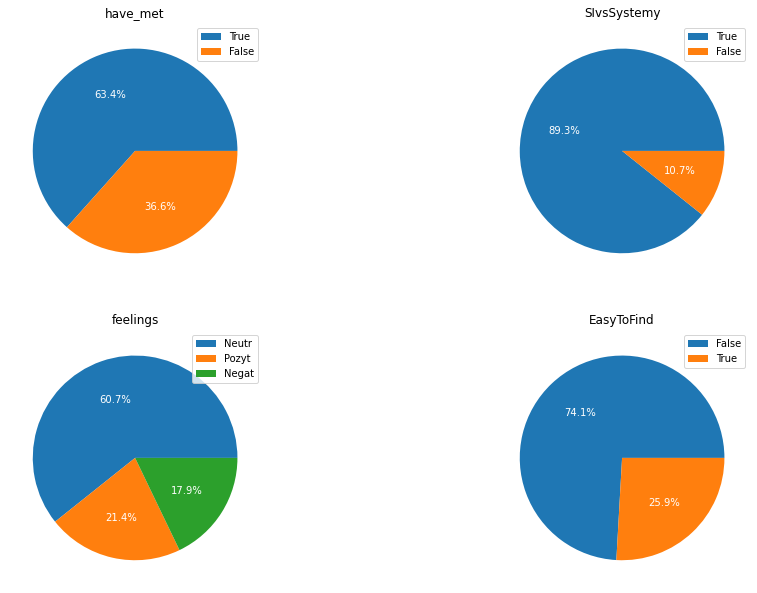

In [61]:
categorical3 = ['have_met','SIvsSystemy','feelings','EasyToFind']

def func(pct):
    return "{:.1f}%".format(pct)


plt.figure(figsize=(16, 16))
for i, col in enumerate(categorical3):
    ax = plt.subplot(3, 2, i+1)
    ax.pie(df[col].value_counts(), autopct=lambda pct: func(pct),
                                  textprops=dict(color="w"))
    
    ax.set_title(col)
    
    plt.legend(df[col].value_counts().index.tolist())

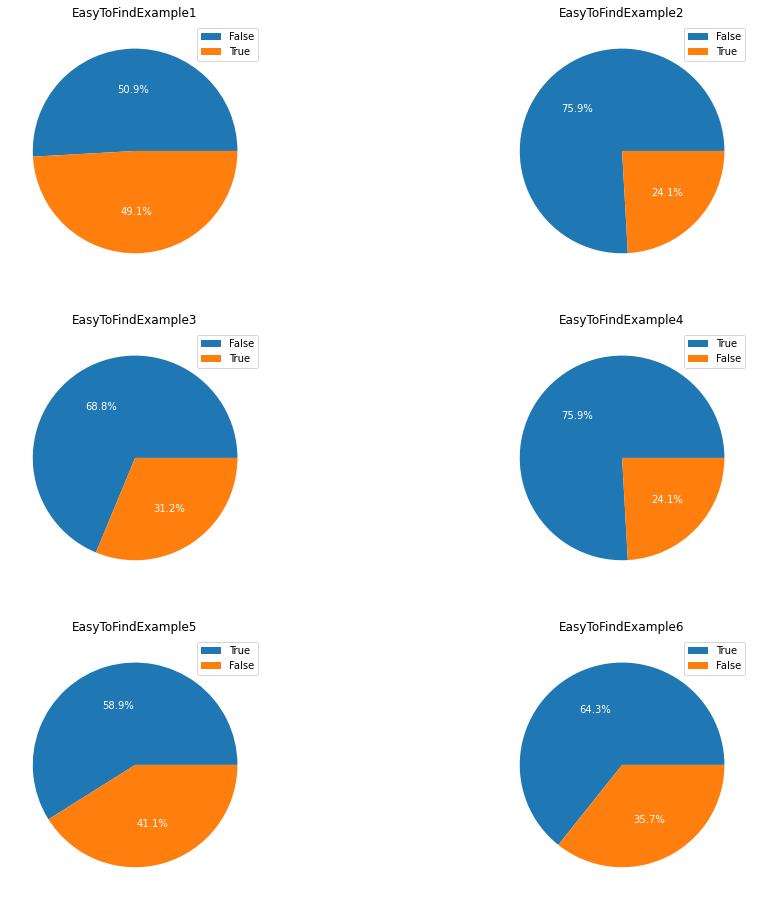

In [62]:
categorical4 = ['EasyToFindExample1','EasyToFindExample2','EasyToFindExample3',
              'EasyToFindExample4','EasyToFindExample5','EasyToFindExample6']

def func(pct):
    return "{:.1f}%".format(pct)


plt.figure(figsize=(16, 16))
for i, col in enumerate(categorical4):
    ax = plt.subplot(3, 2, i+1)
    ax.pie(df[col].value_counts(), autopct=lambda pct: func(pct),
                                  textprops=dict(color="w"))
    
    ax.set_title(col)
    
    plt.legend(df[col].value_counts().index.tolist())

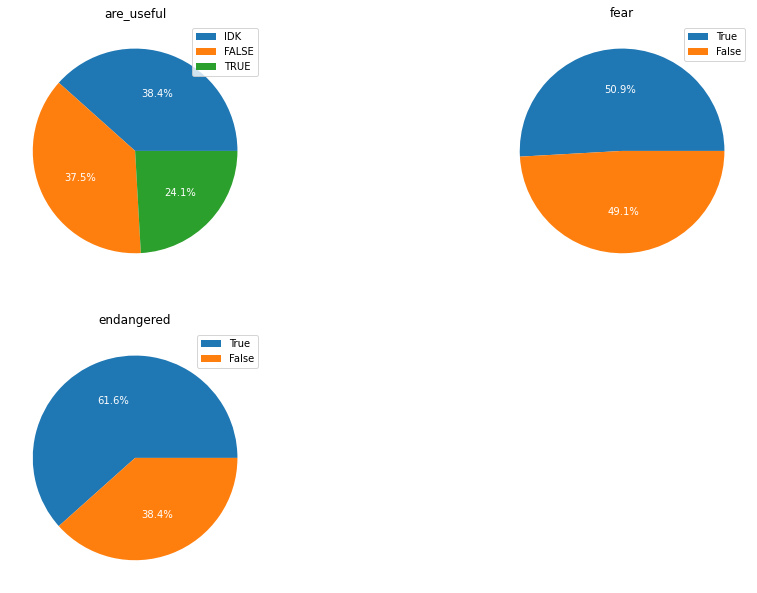

In [63]:
categorical5 = ['are_useful','fear','endangered']

def func(pct):
    return "{:.1f}%".format(pct)


plt.figure(figsize=(16, 16))
for i, col in enumerate(categorical5):
    ax = plt.subplot(3, 2, i+1)
    ax.pie(df[col].value_counts(), autopct=lambda pct: func(pct),
                                  textprops=dict(color="w"))
    
    ax.set_title(col)
    
    plt.legend(df[col].value_counts().index.tolist())

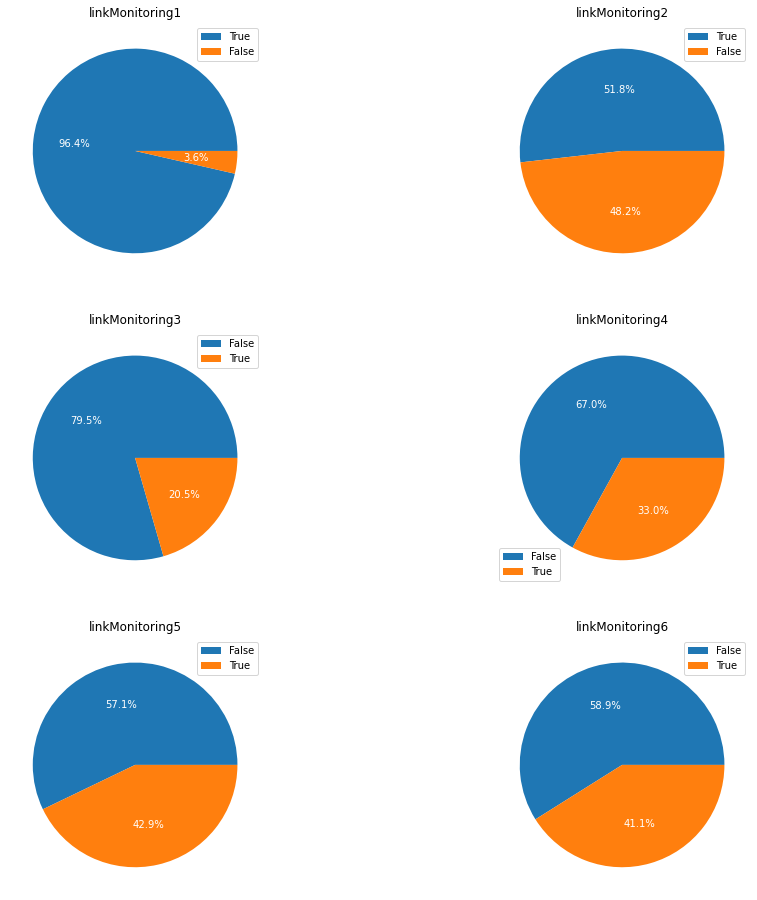

In [64]:
categorical6 = ['linkMonitoring1','linkMonitoring2','linkMonitoring3','linkMonitoring4','linkMonitoring5','linkMonitoring6']

def func(pct):
    return "{:.1f}%".format(pct)


plt.figure(figsize=(16, 16))
for i, col in enumerate(categorical6):
    ax = plt.subplot(3, 2, i+1)
    ax.pie(df[col].value_counts(), autopct=lambda pct: func(pct),
                                  textprops=dict(color="w"))
    
    ax.set_title(col)
    
    plt.legend(df[col].value_counts().index.tolist())

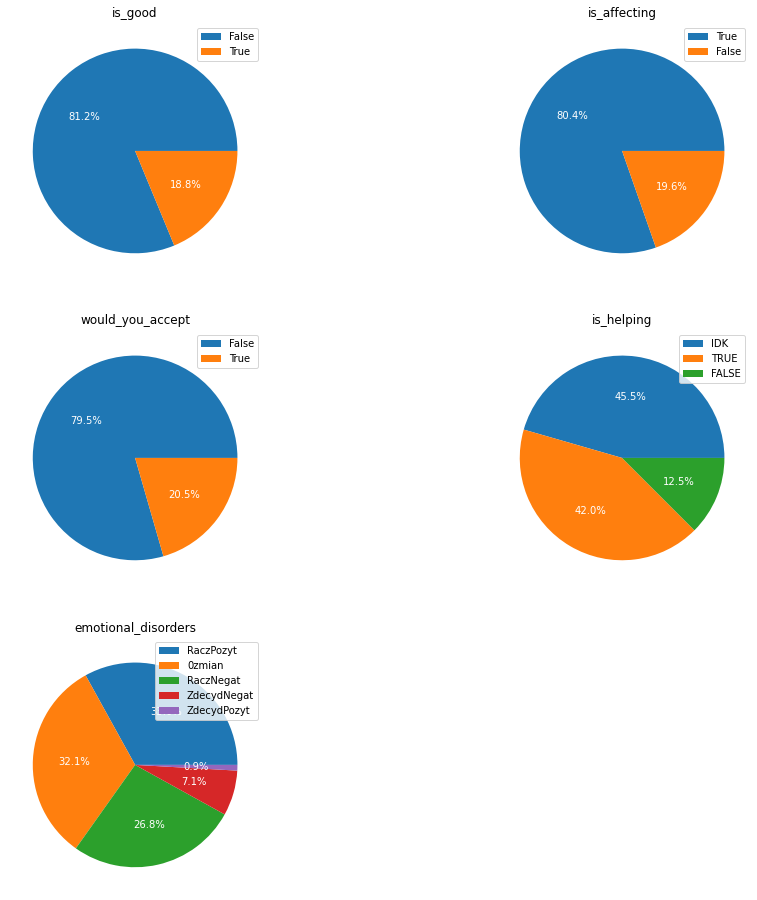

In [65]:
categorical7 = ['is_good','is_affecting','would_you_accept','is_helping','emotional_disorders']

def func(pct):
    return "{:.1f}%".format(pct)


plt.figure(figsize=(16, 16))
for i, col in enumerate(categorical7):
    ax = plt.subplot(3, 2, i+1)
    ax.pie(df[col].value_counts(), autopct=lambda pct: func(pct),
                                  textprops=dict(color="w"))
    
    ax.set_title(col)
    
    plt.legend(df[col].value_counts().index.tolist())